In [176]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

In [177]:
df = pd.read_csv("./data/credit_npo.csv")
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


*Tirando de herramientas chatteras:*

1. **SeriousDlqin2yrs**: Variable dependiente/binaria. Indica si el individuo experimentó morosidad de 90 días o más en los próximos dos años al momento de la toma de datos. Un valor de 1 indica que sí experimentó dificultades financieras serias, y 0 en caso contrario.

2. **RevolvingUtilizationOfUnsecuredLines**: Proporción del crédito utilizado por el consumidor en relación con todas sus líneas de crédito disponibles sin garantía (como tarjetas de crédito).

3. **age**: Edad del prestatario en años.

4. **NumberOfTime30-59DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 30 y 59 días en sus pagos, pero no peor en los últimos 2 años.

5. **DebtRatio**: Relación deuda/ingreso. Es una medida de la carga de deuda del prestatario, calculada como sus pagos mensuales de deuda divididos por su ingreso mensual.

6. **MonthlyIncome**: Ingreso mensual del prestatario.

7. **NumberOfOpenCreditLinesAndLoans**: Número de préstamos abiertos y líneas de crédito (como préstamos para automóviles, hipotecas, préstamos personales, etc.).

8. **NumberOfTimes90DaysLate**: Número de veces que el prestatario ha estado retrasado más de 90 días en sus pagos.

9. **NumberRealEstateLoansOrLines**: Número de préstamos o líneas de crédito inmobiliarios, incluyendo hipotecas y líneas de crédito con garantía hipotecaria.

10. **NumberOfTime60-89DaysPastDueNotWorse**: Número de veces que el prestatario ha estado retrasado entre 60 y 89 días en sus pagos, pero no peor en los últimos 2 años.

11. **NumberOfDependents**: Número de dependientes que el prestatario tiene en su familia, excluyéndose a sí mismo.



In [178]:
target = "SeriousDlqin2yrs"

In [179]:
# bt.pinta_distribucion_categoricas(df,[target], mostrar_valores= True)

In [180]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [181]:
ndp = "NumberOfDependents"
mi = "MonthlyIncome"

In [182]:
moda_train = train_set[ndp].mode()
print(moda_train)

0    0.0
Name: NumberOfDependents, dtype: float64


In [183]:
moda_train = moda_train[0]
train_set[ndp] = train_set[ndp].fillna(moda_train)
test_set[ndp] = test_set[ndp].fillna(moda_train)

In [184]:
# bt.plot_combined_graphs(train_set, columns=[mi], bins = 50)

In [185]:
mediana = train_set[mi].quantile(0.5)
train_set[mi] = train_set[mi].fillna(mediana)
test_set[mi] = test_set[mi].fillna(mediana)

# Mini EDA

In [186]:
# bt.plot_categorical_relationship_fin(train_set, target, ndp, show_values= True, relative_freq= True)

In [187]:
# features = [col for col in train_set.columns if col != target]
# for col in features:
    # bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

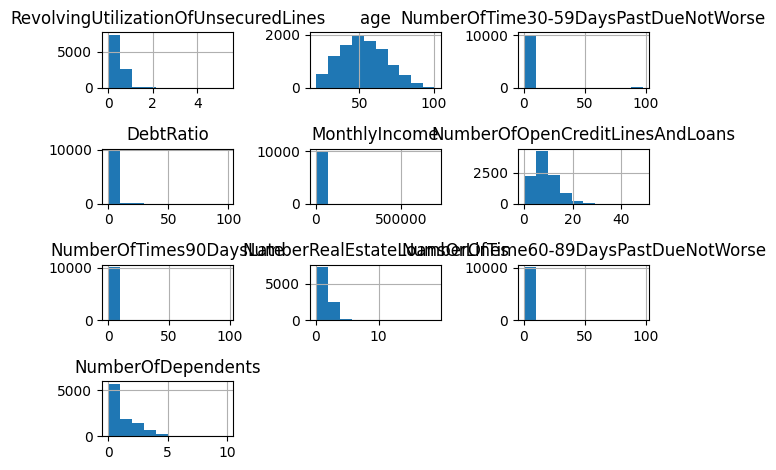

In [188]:
features = [col for col in train_set.columns if col != target]

train_set[features].hist()
plt.tight_layout()

In [189]:
X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

In [190]:
# Un pipeline cada uno:
# Bastien -> no supervisado
# Genma -> GridsearchCV
# Guillem -> onehotencoder
# Ruben -> supervisado

In [191]:
# Crear el pipeline
pipeline = ImbPipeline([
    ('undersampling', RandomUnderSampler(random_state=42)),  # Paso de undersampling
    ('clf', RandomForestClassifier(random_state=42))  # Modelo de clasificación
])
# Entrenar el pipeline
pipeline.fit(X_train, y_train)
# Realizar predicciones y evaluar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2345
           1       0.18      0.70      0.29       163

    accuracy                           0.77      2508
   macro avg       0.58      0.74      0.57      2508
weighted avg       0.92      0.77      0.83      2508



In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import re

In [193]:
#ESCALADO DE FEATURES
#Definimos las columnas que están bien y no necesitan nada

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [194]:
X_train.describe()
# Parece que todas necesitan normalizarse y todas son numericas

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,10029.000000,10029.000000,10029.00000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000
mean,0.332534,52.006681,0.40014,1.859805,6814.873916,8.480905,0.250972,0.997408,0.221258,0.807957
std,0.368161,15.064668,3.96043,9.053464,12421.217919,5.150639,3.940818,1.145652,3.923659,1.131119
min,0.000000,21.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030773,41.000000,0.00000,0.142648,3547.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.164421,51.000000,0.00000,0.301520,5415.500000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.588571,62.000000,0.00000,0.506312,8000.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,5.347652,101.000000,98.00000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [195]:
num_pipeline = Pipeline(
    [("Impute_Mode", SimpleImputer(strategy = "median")),
     ("SScaler", StandardScaler())
    ]
)

preprocessing = ColumnTransformer(
    [("Impute_Numeric", num_pipeline, X_train.columns)], remainder = "passthrough")

In [196]:
pipe_X_train = preprocessing.fit_transform(X_train)
df_pipe_X_train = pd.DataFrame(pipe_X_train, columns=preprocessing.get_feature_names_out())
df_pipe_X_train.describe()

,Impute_Numeric__RevolvingUtilizationOfUnsecuredLines,Impute_Numeric__age,Impute_Numeric__NumberOfTime30-59DaysPastDueNotWorse,Impute_Numeric__DebtRatio,Impute_Numeric__MonthlyIncome,Impute_Numeric__NumberOfOpenCreditLinesAndLoans,Impute_Numeric__NumberOfTimes90DaysLate,Impute_Numeric__NumberRealEstateLoansOrLines,Impute_Numeric__NumberOfTime60-89DaysPastDueNotWorse,Impute_Numeric__NumberOfDependents
count,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04,1.002900e+04
mean,1.416976e-17,1.494910e-16,-1.133581e-17,-3.542441e-18,-2.692255e-17,-4.746870e-17,2.833952e-18,-4.507756e-17,-2.833952e-17,-2.125464e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-9.032760e-01,-2.058341e+00,-1.010394e-01,-2.054349e-01,-5.486752e-01,-1.646656e+00,-6.368848e-02,-8.706460e-01,-5.639364e-02,-7.143344e-01
25%,-8.196858e-01,-7.306653e-01,-1.010394e-01,-1.896779e-01,-2.631012e-01,-6.758539e-01,-6.368848e-02,-8.706460e-01,-5.639364e-02,-7.143344e-01
50%,-4.566533e-01,-6.682728e-02,-1.010394e-01,-1.721289e-01,-1.126656e-01,-9.337276e-02,-6.368848e-02,2.263001e-03,-5.639364e-02,-7.143344e-01
75%,6.954818e-01,6.633945e-01,-1.010394e-01,-1.495074e-01,9.541618e-02,4.891083e-01,-6.368848e-02,8.751720e-01,-5.639364e-02,1.697900e-01
max,1.362276e+01,3.252363e+00,2.464498e+01,1.073015e+01,5.601060e+01,7.867202e+00,2.480549e+01,1.571463e+01,2.492154e+01,8.126909e+00


In [200]:
logistic_pipeline = Pipeline(
    [("Modelo", LogisticRegression())
    ])

random_pipeline = Pipeline(
    [("Modelo", RandomForestClassifier())
    ])

xgb_pipeline = Pipeline(
    [("Modelo", XGBClassifier())
    ])

In [201]:
for name,pipe in zip(["logistic","randomF", "XGB"],[logistic_pipeline, random_pipeline, xgb_pipeline]):
    resultado = cross_val_score(estimator=pipe, X= pipe_X_train, y=y_train, cv = 5, scoring = "accuracy")
    print(f"{name}: {np.mean(resultado):.4f}")
    print(resultado)

logistic: 0.9305
[0.93170489 0.92821535 0.93170489 0.92921236 0.93167082]
randomF: 0.9335
[0.93519442 0.93419741 0.92971087 0.93120638 0.93715711]
XGB: 0.9279
[0.92522433 0.93070788 0.9227318  0.92671984 0.93416459]


In [ ]:
pipe_reg_log_param = {    
                 "Modelo__penalty": [None,"l2"], 
                 "Modelo__C": np.logspace(0, 4, 10)
                }

pipe_rand_forest_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__max_features': [1, 2, 3]
    }

pipe_xgb_param = {
    'Modelo__n_estimators': [10, 100, 200, 400],
    'Modelo__max_depth': [1,2,4,8],
    'Modelo__learning_rate': [0.1,0.2,0.5,1.0]
}

cv = 5

gs_reg_log = GridSearchCV(logistic_pipeline,
                            pipe_reg_log_param,
                            cv=cv,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_rand_forest = GridSearchCV(random_pipeline,
                            pipe_rand_forest_param,
                            cv=cv,
                            scoring="accuracy",
                            verbose=1,
                            n_jobs=-1)

gs_xgb = GridSearchCV(xgb_pipeline,
                        pipe_xgb_param,
                        cv=cv,
                        scoring="accuracy",
                        verbose=1,
                        n_jobs=-1)

pipe_grids = {"gs_reg_log":gs_reg_log,
         "gs_rand_forest":gs_rand_forest,
         "gs_xgb":gs_xgb}
    


In [ ]:
%%time
for nombre, grid_search in pipe_grids.items():
    grid_search.fit(train, y_train)

In [ ]:
best_grids = [(i, j.best_score_) for i, j in pipe_grids.items()]

best_grids = pd.DataFrame(best_grids, columns=["Grid", "Best score"]).sort_values(by="Best score", ascending=False)
best_grids

In [ ]:
best_model = pipe_grids[best_grids.iloc[0,0]]